In [1]:
import os,glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.patches import Rectangle
import pickle
import cv2
import tensorflow as tf
from dnn.parameters import PARAM
print(tf.__version__)

2.1.0


In [2]:
from yolo_encoder import *
encoder = yoloEncoder()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
example_bbs: tf.Tensor(
[[0.    0.    0.5   0.5   1.    4.   ]
 [0.25  0.25  0.75  0.75  2.    4.   ]
 [0.125 0.125 0.375 0.375 3.    3.   ]], shape=(3, 6), dtype=float32)


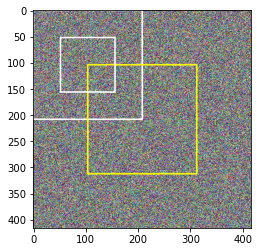

In [4]:
n = 1
test_images = np.random.random([n, encoder.img_size, encoder.img_size, 3])

class_colors = ["cc8888", "d8c400", "36989a", "18941a", "632340"]
class_colors = list(
    map(lambda h: tuple(int(h[i:i + 2], 16) for i in (0, 2, 4)), class_colors))

# [(bbxy1,bbxy2,class,best anchor)]
example_bbs = [[
    0, 0, int(encoder.img_size / 2),
    int(encoder.img_size / 2), 1, 0],
    [
                   int(encoder.img_size / 4),
                   int(encoder.img_size / 4),
                   int(encoder.img_size * 3 / 4),
                   int(encoder.img_size * 3 / 4), 2, 0],
    [
        int(encoder.img_size / 8),
        int(encoder.img_size / 8),
        int(encoder.img_size * 3 / 8),
        int(encoder.img_size * 3 / 8), 3, 0
    ]]

for i, bb in enumerate(example_bbs):
    bb_dim = np.array((bb[2], bb[3])) - (bb[0], bb[1])
    fitness = list(
        map(lambda anch: np.sum(abs(bb_dim - anch)), PARAM['yolo_tiny_anchors']))
    example_bbs[i][-1] = np.argmin(fitness)
    cv2.rectangle(test_images[0], (bb[0], bb[1]), (bb[2], bb[3]),
                  class_colors[bb[-2] - 1], 2)

plt.figure()
plt.imshow(test_images[0])
example_bbs = np.array(example_bbs,dtype=np.float32)
example_bbs[:,0:4]/=encoder.img_size
example_bbs = tf.convert_to_tensor(example_bbs,dtype = tf.float32)
print("example_bbs:", example_bbs)

In [6]:
scale=1
yolo_label = encoder.transform_label_for_output(example_bbs,
                                                grid_size=13*scale,
                                                masks=PARAM["yolo_tiny_anchor_masks"][scale-1])

In [7]:
print(np.sum(yolo_label))

12.25


In [ ]:
# Someone write decoding?